In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

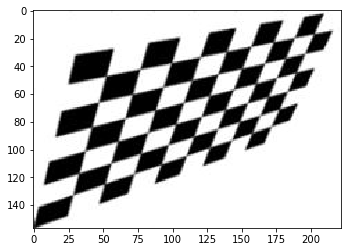

In [2]:
image = cv2.imread('../image/skewed_chess_board.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)


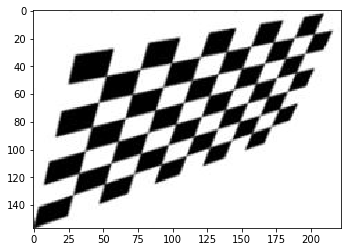

In [3]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')


In [5]:
#convert gray to float32
gray = np.float32(gray)

#detect corners
dst = cv2.cornerHarris(gray,2,3,0.04)

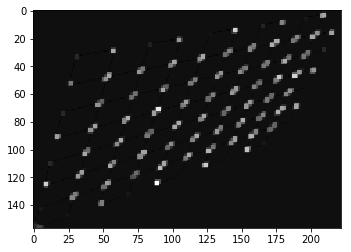

In [7]:
dst = cv2.dilate(dst,None)
plt.imshow(dst, cmap='gray')

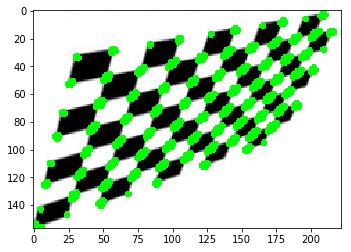

In [11]:
#define threshold for defining strong corners
thresh= 0.01*dst.max()

corner_image= np.copy(image_copy)
#if passed thru threshold iterate thru all the corners and draw them on the image

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if (dst[j,i] > thresh):
            #image , center point , radius, color , thickness
            cv2.circle(corner_image,(i,j),1,(0,255,0),1)
plt.imshow(corner_image)